In [3]:
#import atomsci.ddm.utils.pubchem_utils as pu
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd

# Additional python libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

print("AMPL imports done.")

AMPL imports done.


In [4]:
target='CYP2C9'

In [5]:
data_dir = './../Data/'+ target + '-ampl-1.1.0_old/'
outdir = './../Data/'+ target + '-Curated/'
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [6]:
!ls $data_dir

CHEMBL25-CYP2C9_human_IC50_26Nov2019.txt
cyp2c9_chembl_testset_base_smiles_union.csv
cyp2c9_dtc_smiles.csv
cyp2c9_dtc_testset_base_smiles_union.csv
cyp2c9_excape_smiles.csv
cyp2c9_excape_testset_base_smiles_union.csv
cyp2c9_union_testset_base_smiles.csv
cyp2c9_union_trainset_base_smiles.csv
cyp2c9_union_trainset_base_smiles_train_valid_test_scaffold_050a3c4b-46f1-4678-8029-94ddb31b9622.csv
cyp2c9_union_trainset_base_smiles_train_valid_test_scaffold_1f2dd205-7845-4c8a-bf5d-62e207655095.csv
cyp2c9_union_trainset_base_smiles_train_valid_test_scaffold_68950577-f8a1-4373-a48f-d8c644312e8e.csv
cyp2c9_union_trainset_base_smiles_train_valid_test_scaffold_c4fd7f92-a4b1-41a4-a85b-1990dfac0204.csv
cyp2c9_union_trainset_base_smiles_train_valid_test_scaffold_e6041d91-df79-4bc6-93b6-ad13b3205d06.csv
scaled_descriptors


In [8]:
# dtc_raw from MoDaC
dtc_raw_file=data_dir+target.lower()+'_dtc_smiles.csv'
if os.path.exists(dtc_raw_file):print(dtc_raw_file);
dtc_raw_df=pd.read_csv(dtc_raw_file)
print(len(dtc_raw_df.columns))
dtc_raw_df.head(5)
#dtc_raw_df.standard_relation

./../Data/CYP2C9-ampl-1.1.0_old/cyp2c9_dtc_smiles.csv
38


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,assay_description,title,journal,doc_type,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,24015967.0,...,Inhibition of human CYP2C9,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22039836.0,...,Inhibition of CYP2C9,Optimization of a potent class of arylamide co...,J. Med. Chem.,PUBLICATION,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...
2,CHEMBL1086377,AATCBLYHOUOCTO-UHFFFAOYSA-N,KU-0060648,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,23855836.0,...,Inhibition of CYP2C9 (unknown origin),"1-substituted (Dibenzo[b,d]thiophen-4-yl)-2-mo...",J. Med. Chem.,PUBLICATION,NaN,5.000000,2,11964036,CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2)...,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...
3,CHEMBL2017279,AAVAYKQPRIQKRX-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22386529.0,...,Inhibition of CYP2C9,From ApoA1 upregulation to BET family bromodom...,Bioorg. Med. Chem. Lett.,PUBLICATION,NaN,5.292430,3,70685377,CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=C...,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...
4,CHEMBL490153,ABACVOXFUHDKNZ-UHFFFAOYSA-N,A-867744,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,19419141.0,...,Inhibition of CYP2C9,Discovery of 4-(5-(4-chlorophenyl)-2-methyl-3-...,J. Med. Chem.,PUBLICATION,NaN,5.000000,4,23642319,CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C=...,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...


In [14]:
# # dtc_raw from LC saved old file (2020)
# # file_path='/usr/workspace/atom/dtc/', it was saved at folwoing location
# #dtc_raw_LC_df=pd.read_csv('/usr/workspace/atom/public_dsets/DTC/raw/'+target.lower()+'.csv')
# dtc_raw_LC_df=pd.read_csv('/usr/workspace/atom/public_dsets/DTC/raw/'+target.lower()+'_dtc_smiles.csv') # this file matchs with MoDaC '_dtc_smiles.csv'
# dtc_raw_LC_df.head(2)

In [15]:
# [dtc_raw_df.shape, dtc_raw_LC_df.shape]

In [16]:
# dtc_raw_curated_LC_df = pd.read_csv('/usr/workspace/atom/public_dsets/DTC/curated/'+target.lower()+'_dtc_smiles_regr_all.csv')
# print(dtc_raw_curated_LC_df.shape)
# dtc_raw_curated_LC_df.head(2)
# #dtc_raw_curated_LC_df.relation

In [17]:
# dtc_raw_curated_LC_MLready_df = pd.read_csv('/usr/workspace/atom/public_dsets/DTC/ml_ready/'+target.lower()+'_dtc_base_smiles_all.csv')
# print(dtc_raw_curated_LC_MLready_df.shape)
# dtc_raw_curated_LC_MLready_df.head(2)
# #dtc_raw_curated_LC_df.standard_relation

In [ ]:
# # note: you need to keep the file genTestset.py at the same location of the notebook
# # original file can be found at: https://lc.llnl.gov/gitlab/atom/data_science/-/blob/master/code/genTestset.py
# # I have downloaded it. 
# import genTestset as gt 
# gt.__file__

In [ ]:
# #-------------------------------
# # Aggregate base rdkit smiles
# #------------------------------- 
# def aggregate_basesmiles(assay_df, value_col='pIC50', output_value_col=None,
#                          label_actives=True,
#                          active_thresh=None,
#                          id_col='compound_id', smiles_col='base_rdkit_smiles', relation_col='VALUE_FLAG', date_col=None)

In [ ]:
NOTES ODM Meeting - 9/28/22:
    ##regression data -> label_actives=False
classifiation data -> numeric value for response col (pIC50)
inhibitors yes/no -> label_actives=True, >threashold = active compound

# relation col 
pIC50 -> reported value is actual true measurement 
         series of individual measuremens of different compounds 
        IC50 - logistic curve of 50% inhibition 
        e.g max 100 um , value > 100, relation -> '>' depends on the experements 
        
        ic50> 100 um ---- PIC50 <4 (standardize_relations())

# curate dtc_raw
### contains 'standard_relation' column

In [9]:
dtc_raw_df.shape

(3198, 38)

In [10]:
dtc_raw_df.columns

Index(['compound_id', 'standard_inchi_key', 'compound_name', 'synonym',
       'target_id', 'target_pref_name', 'gene_names', 'wildtype_or_mutant',
       'mutation_info', 'pubmed_id', 'standard_type', 'standard_relation',
       'standard_value', 'standard_units', 'activity_comment',
       'ep_action_mode', 'assay_format', 'assaytype', 'assay_subtype',
       'inhibitor_type', 'detection_tech', 'assay_cell_line',
       'compound_concentration_value', 'compound_concentration_value_unit',
       'substrate_type', 'substrate_relation', 'substrate_value',
       'substrate_units', 'assay_description', 'title', 'journal', 'doc_type',
       'annotation_comments', 'PIC50', 'Unnamed: 0', 'CID', 'smiles',
       'rdkit_smiles'],
      dtype='object')

In [11]:
dtc_raw_df.head(2)

,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,assay_description,title,journal,doc_type,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,24015967.0,...,Inhibition of human CYP2C9,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22039836.0,...,Inhibition of CYP2C9,Optimization of a potent class of arylamide co...,J. Med. Chem.,PUBLICATION,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...


### Check for assay replicates with high measurement variation and flag them


In [12]:
data=dtc_raw_df
column = 'PIC50' # response col
tolerance = 10 # tolerance: Percentage of individual respsonse values allowed to different from the average to be included in averaging
list_bad_duplicates = 'Yes'
max_std = 1 # max_std: Maximum allowed standard deviation for computed average response value, # NOTE: In this example, we set this value very high to disable this feature
compound_id = 'standard_inchi_key'
smiles_col = 'rdkit_smiles'
check_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (3153, 42)
List of 'bad' duplicates removed
               standard_inchi_key     PIC50  VALUE_NUM_mean   Perc_Var  \
34    AGUILNAYEDJFSM-FIFLTTCUSA-N  4.671620        3.171810  47.285623   
35    AGUILNAYEDJFSM-FIFLTTCUSA-N  1.672000        3.171810  47.285623   
107   AWUSJMKLSWCCKF-DFEHQXHXSA-N  4.259637        2.759819  54.344826   
108   AWUSJMKLSWCCKF-DFEHQXHXSA-N  1.260000        2.759819  54.344826   
206   BQUXAJWDRCSKFN-IBGZPJMESA-N  4.534617        4.116794  10.149248   
207   BQUXAJWDRCSKFN-IBGZPJMESA-N  3.698970        4.116794  10.149248   
392   DDGVRFAFSCAHHH-KQQUZDAGSA-N  4.229148        2.729074  54.966410   
393   DDGVRFAFSCAHHH-KQQUZDAGSA-N  1.229000        2.729074  54.966410   
566   FLMOTUCGPJDWCT-KQQUZDAGSA-N  4.202040        2.702020  55.514766   
567   FLMOTUCGPJDWCT-KQQUZDAGSA-N  1.202000        2.702020  55.514766   
612   FTEGUKWEUQPKIS-YDWXAUTNSA-N  2.745000        4.244864  35.333613   
611   FTEGUKWEUQP

### Examine the rejected compounds and examine them

In [20]:
compound_id='rdkit_smiles'
# Takes all the compounds that aren't part of the curated data frame and prints them
reject=data[~data[compound_id].isin(check_df[compound_id])]
print(reject.shape)
reject.head(2)

(38, 38)


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,assay_description,title,journal,doc_type,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles
34,CHEMBL497783,AGUILNAYEDJFSM-FIFLTTCUSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,18249473.0,...,Inhibition of human recombinant CYP2C9,Structure-activity relationships for the inhib...,Eur. J. Med. Chem.,PUBLICATION,NaN,4.67162,34,5708672,C1=CC(=CC(=C1)Cl)C=CC(=O)C=CC2=CC(=CC=C2)Cl,O=C(C=Cc1cccc(Cl)c1)C=Cc1cccc(Cl)c1
35,CHEMBL497783,AGUILNAYEDJFSM-FIFLTTCUSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,18249473.0,...,Inhibition of human recombinant CYP2C9,Structure-activity relationships for the inhib...,Eur. J. Med. Chem.,PUBLICATION,NaN,1.67200,34,5708672,C1=CC(=CC(=C1)Cl)C=CC(=O)C=CC2=CC(=CC=C2)Cl,O=C(C=Cc1cccc(Cl)c1)C=Cc1cccc(Cl)c1


In [21]:
# Prints number of unique rejected compound names and rows
print("Number of discarded compounds",reject[compound_id].nunique())

# Apecifies directory for csv file to send rejected data to, saving it as ofile 
ofile = outdir+target+'-DTC.reject_check'

# Sends the rejected compound dataframe to a csv file with the path (ofile) specified above
reject.to_csv(ofile,index=False)
reject.head(2)

Number of discarded compounds 19


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,assay_description,title,journal,doc_type,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles
34,CHEMBL497783,AGUILNAYEDJFSM-FIFLTTCUSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,18249473.0,...,Inhibition of human recombinant CYP2C9,Structure-activity relationships for the inhib...,Eur. J. Med. Chem.,PUBLICATION,NaN,4.67162,34,5708672,C1=CC(=CC(=C1)Cl)C=CC(=O)C=CC2=CC(=CC=C2)Cl,O=C(C=Cc1cccc(Cl)c1)C=Cc1cccc(Cl)c1
35,CHEMBL497783,AGUILNAYEDJFSM-FIFLTTCUSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,18249473.0,...,Inhibition of human recombinant CYP2C9,Structure-activity relationships for the inhib...,Eur. J. Med. Chem.,PUBLICATION,NaN,1.67200,34,5708672,C1=CC(=CC(=C1)Cl)C=CC(=O)C=CC2=CC(=CC=C2)Cl,O=C(C=Cc1cccc(Cl)c1)C=Cc1cccc(Cl)c1


In [22]:
reject_df = reject[['compound_id', 'PIC50','rdkit_smiles']]
reject_df

,compound_id,PIC50,rdkit_smiles
34,CHEMBL497783,4.671620,O=C(C=Cc1cccc(Cl)c1)C=Cc1cccc(Cl)c1
35,CHEMBL497783,1.672000,O=C(C=Cc1cccc(Cl)c1)C=Cc1cccc(Cl)c1
107,CHEMBL498372,4.259637,CC(C)(C)c1cc(C=C2CCC(=Cc3cc(C(C)(C)C)c(O)c(C(C...
108,CHEMBL498372,1.260000,CC(C)(C)c1cc(C=C2CCC(=Cc3cc(C(C)(C)C)c(O)c(C(C...
206,CHEMBL551991,4.534617,Cc1cc2cc(NC(=NC3CCCCN(CC(=O)N4CCCC4)C3=O)NC#N)...
207,CHEMBL551991,3.698970,Cc1cc2cc(NC(=NC3CCCCN(CC(=O)N4CCCC4)C3=O)NC#N)...
392,CHEMBL493001,4.229148,COc1cc(C=CC(=O)C=Cc2cc(OC)c(O)c(OC)c2)cc(OC)c1O
393,CHEMBL493001,1.229000,COc1cc(C=CC(=O)C=Cc2cc(OC)c(O)c(OC)c2)cc(OC)c1O
566,CHEMBL407034,4.202040,Cc1cc(C=CC(=O)C=Cc2cc(C)c(O)c(C)c2)cc(C)c1O
567,CHEMBL407034,1.202000,Cc1cc(C=CC(=O)C=Cc2cc(C)c(O)c(C)c2)cc(C)c1O


In [23]:
reject_df = reject_df.drop_duplicates(subset=['rdkit_smiles'])
print(reject_df.shape)
reject_df

(19, 3)


,compound_id,PIC50,rdkit_smiles
34,CHEMBL497783,4.671620,O=C(C=Cc1cccc(Cl)c1)C=Cc1cccc(Cl)c1
107,CHEMBL498372,4.259637,CC(C)(C)c1cc(C=C2CCC(=Cc3cc(C(C)(C)C)c(O)c(C(C...
206,CHEMBL551991,4.534617,Cc1cc2cc(NC(=NC3CCCCN(CC(=O)N4CCCC4)C3=O)NC#N)...
392,CHEMBL493001,4.229148,COc1cc(C=CC(=O)C=Cc2cc(OC)c(O)c(OC)c2)cc(OC)c1O
566,CHEMBL407034,4.202040,Cc1cc(C=CC(=O)C=Cc2cc(C)c(O)c(C)c2)cc(C)c1O
611,CHEMBL129134,5.744727,O=C(C=Cc1ccc(O)cc1)C=Cc1ccc(O)cc1
1058,CHEMBL2043240,3.665546,NC(=O)C[S+]([O-])Cc1ccccc1Oc1ccc(Cl)c(Cl)c1
1095,CHEMBL359657,5.050610,NCc1ccc(-c2cccnc2)s1
1477,CHEMBL482409,6.000000,O=C1C(=Cc2ccc(O)cc2)CCCC1=Cc1ccc(O)cc1
1566,CHEMBL163,5.309804,CC(C)c1nc(CN(C)C(=O)NC(C(=O)NC(Cc2ccccc2)CC(O)...


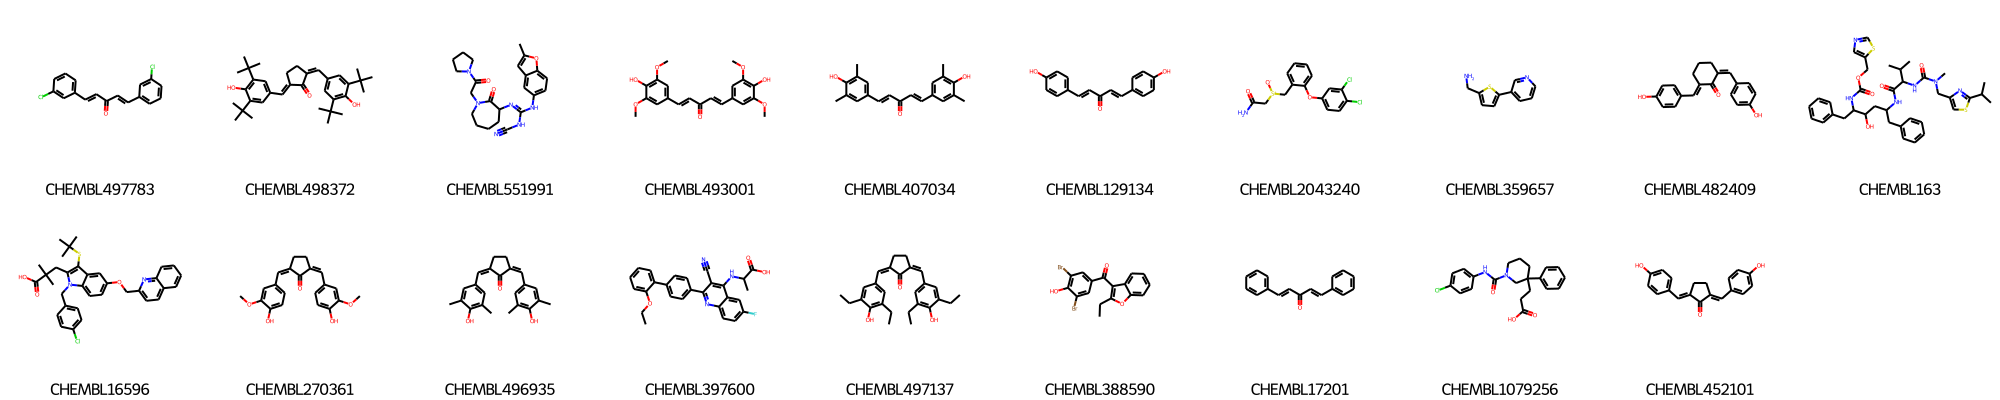

In [24]:
# display discarded molecules
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
#IPythonConsole.molSize = 500,500
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

smiles_list = reject_df['rdkit_smiles'].to_list()
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
Chem.Draw.MolsToGridImage(mol_list, molsPerRow=10, legends=reject_df.compound_id.to_list(), subImgSize=(200,200))
#PandasTools.AddMoleculeColumnToFrame(reject_df,'rdkit_smiles','molecule',includeFingerprints=True)

In [ ]:
# Prints all the results of the unique assay tests run on this target
#dtc_raw_df['assay_description'].unique()

In [25]:
# Collects all the non-rejected data into a new frame called data
data=dtc_raw_df[~dtc_raw_df[compound_id].isin(reject[compound_id])]

# Prints the rows & columns (in that order) of the dataset from above (i.e. all the matching data)
# Shape is an array that can check how large the dataframe is 
# It will print out (x, y), the x is the rows, or lines, and y is the number of columns 
print(data.shape)

(3160, 38)


In [26]:
data[['standard_inchi_key','rdkit_smiles','standard_relation']].head(5)

,standard_inchi_key,rdkit_smiles,standard_relation
0,AAAQFGUYHFJNHI-SFHVURJKSA-N,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...,>=
1,AADUJBXZMSDOOW-UHFFFAOYSA-N,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...,>
2,AATCBLYHOUOCTO-UHFFFAOYSA-N,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...,>
3,AAVAYKQPRIQKRX-UHFFFAOYSA-N,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...,=
4,ABACVOXFUHDKNZ-UHFFFAOYSA-N,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...,>


In [27]:
#specifies the column we want (response value) and also tells it to include the duplicates
column='PIC50'; #'standard_value'
list_bad_duplicates='Yes'

# Actually compiles all the data with the specifies column and tells what columns to include 
# (inchi_key, smiles, and relation)
temp_df=curate_data.aggregate_assay_data(data, 
                                         value_col=column, 
                                         output_value_col=None,
                                         label_actives=True,
                                         active_thresh=6,
                                         id_col='standard_inchi_key', 
                                         smiles_col='rdkit_smiles', 
                                         relation_col='standard_relation')

#Removes all duplicates from the data frame and puts it in the final, curated dataframe
curated_df = temp_df[~temp_df.isin([np.inf]).any(1)]

In [28]:
# prints the number of rows in the before and after curation 
print("before",data.shape[0],"after",curated_df.shape[0])

#prints the first few rows of the "after" (after curation) dataframes
curated_df.head()

before 3160 after 2824


,compound_id,base_rdkit_smiles,relation,PIC50,active
0,TWDJYRDXTHJMHU-UHFFFAOYSA-N,O=c1ccc(-c2nc3ccc(S(=O)(=O)C(F)(F)F)cc3[nH]2)c...,,5.124939,0
1,BBYGAEPKKAXIBP-GFCCVEGCSA-N,CCn1c(C(C)NS(=O)(=O)c2ccc(C#N)nc2)nc2cnc(C3CC3...,>,4.698970,0
2,IIPPFWIHUHXQNA-PKOBYXMFSA-N,O=C(NC1CC1c1ccccc1)N1CCC(c2nc(-c3ccccn3)no2)CC1,>,5.000000,0
3,RSMNNOCYZZCWMX-UHFFFAOYSA-N,COc1ccc(CNC(=O)Nc2ccc(S(=O)(=O)c3ccccc3)cc2)cn1,>,5.000000,0
4,WYJRHMPICZARGU-UHFFFAOYSA-N,Cc1nc(-c2ccc(C)c(-c3ccc4c(c3)NC(=O)C43CCOCC3)c...,>,4.602060,0


In [29]:
# specifies file path to save the curated data to
ofile = outdir + target+'_dtc_smiles_curated.csv'

# sends data from the curated_df to csv with specified path above
curated_df.to_csv(ofile,index=False)

/g/g92/sarkar7/.conda/envs/AMPL-1.4.1/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


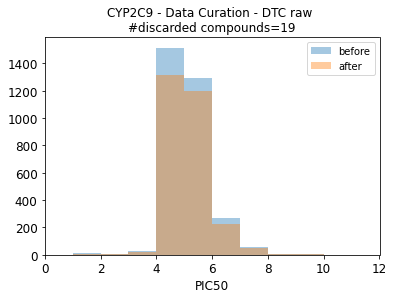

In [30]:
fig, ax = plt.subplots()
before=dtc_raw_df["PIC50"]
after=curated_df["PIC50"] 
sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')
plt.legend()
ax.set_xlim([0, 12])
plt.title(target+' - Data Curation - DTC raw \n#discarded compounds='+str(reject[compound_id].nunique()));

# curate dtc_test 
### contains 'relation' column

In [31]:
dtc_test_file=data_dir+target.lower()+'_dtc_testset_base_smiles_union.csv'
if os.path.exists(dtc_test_file):print(dtc_test_file);
dtc_test_df=pd.read_csv(dtc_test_file)
dtc_test_df.head(2)

./../Data/CYP2C9-ampl-1.1.0_old/cyp2c9_dtc_testset_base_smiles_union.csv


,PIC50,base_rdkit_smiles,compound_id,relation,active
0,4.522879,CN(C1CCc2c(c3ccncc3n2CC(=O)O)C1)S(=O)(=O)c1ccc...,UHMQYWPLWZKMOS-CQSZACIVSA-N,>,1
1,5.000000,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(-c3n[nH]...,LCGWKKYPAXXXPK-UHFFFAOYSA-N,>,1


In [32]:
dtc_test_df.shape

(350, 5)

In [33]:
data=dtc_test_df
column = 'PIC50'
tolerance = 10
list_bad_duplicates = 'Yes'
max_std = 1
compound_id = 'compound_id'
smiles_col = 'base_rdkit_smiles'
check_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
# note: checked that this is already curated

Bad duplicates removed from dataset
Dataframe size (350, 9)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, PIC50, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (350, 9)
New column created with averaged values:  VALUE_NUM_mean


# curate excape_raw

In [34]:
excape_raw_df=pd.read_csv(data_dir+ target.lower()+"_excape_smiles.csv")
print(excape_raw_df.shape)
#print(excape_raw_df.columns)
excape_raw_df.head(2)

(9667, 13)


,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pIC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES,rdkit_smiles
0,AABYLPRACHMDSN-CIQXGXBCNA-N,3247284,1559,A,5.90001,pubchem,883,9606,CYP2C9,un28,InChI=1/C26H32N2O3/c1-18(24(29)27-16-19-13-14-...,O=C(NCC1CC1)[C@@H]([C@@H]2[C@](C2)([C@H](NC(OC...,C[C@@H](C(=O)NCC1CC1)[C@H]1C[C@]1(C)[C@H](NC(=...
1,AABYLPRACHMDSN-TWWBEHSRNA-N,CHEMBL1487748,1559,N,4.80000,chembl20,737826,9606,CYP2C9,un28,InChI=1/C26H32N2O3/c1-18(24(29)27-16-19-13-14-...,O=C(NCC1CC1)[C@@H]([C@H]2[C@@](C2)([C@@H](NC(O...,C[C@@H](C(=O)NCC1CC1)[C@@H]1C[C@@]1(C)[C@@H](N...


In [35]:
excape_raw_df.rename(columns={ "Original_Entry_ID" : "compound_id" }, inplace=True)
excape_raw_df['rdkit_smiles'] = excape_raw_df['SMILES'].apply(curate_data.base_smiles_from_smiles)
excape_raw_df.shape

[19:29:59] Explicit valence for atom # 0 S, 7, is greater than permitted
[19:29:59] Explicit valence for atom # 0 S, 7, is greater than permitted
[19:30:00] Explicit valence for atom # 1 S, 7, is greater than permitted
[19:30:01] Explicit valence for atom # 1 S, 7, is greater than permitted
[19:30:01] Explicit valence for atom # 15 S, 7, is greater than permitted
[19:30:01] Explicit valence for atom # 0 S, 7, is greater than permitted
[19:30:02] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:30:02] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:30:03] Explicit valence for atom # 0 S, 7, is greater than permitted
[19:30:03] Explicit valence for atom # 0 S, 7, is greater than permitted
[19:30:03] Explicit valence for atom # 15 S, 7, is greater than permitted
[19:30:04] Explicit valence for atom # 0 S, 7, is greater than permitted
[19:30:04] Explicit valence for atom # 0 S, 7, is greater than permitted
[19:30:05] Explicit valence for atom # 0 S, 7, is

(9667, 13)

In [36]:
excape_raw_df.head(2)

,Ambit_InchiKey,compound_id,Entrez_ID,Activity_Flag,pIC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES,rdkit_smiles
0,AABYLPRACHMDSN-CIQXGXBCNA-N,3247284,1559,A,5.90001,pubchem,883,9606,CYP2C9,un28,InChI=1/C26H32N2O3/c1-18(24(29)27-16-19-13-14-...,O=C(NCC1CC1)[C@@H]([C@@H]2[C@](C2)([C@H](NC(OC...,C[C@@H](C(=O)NCC1CC1)[C@H]1C[C@]1(C)[C@H](NC(=...
1,AABYLPRACHMDSN-TWWBEHSRNA-N,CHEMBL1487748,1559,N,4.80000,chembl20,737826,9606,CYP2C9,un28,InChI=1/C26H32N2O3/c1-18(24(29)27-16-19-13-14-...,O=C(NCC1CC1)[C@@H]([C@H]2[C@@](C2)([C@@H](NC(O...,C[C@@H](C(=O)NCC1CC1)[C@@H]1C[C@@]1(C)[C@@H](N...


In [40]:
column = 'pIC50'
tolerance = 10
list_bad_duplicates = 'Yes'
max_std = 1
compound_id = 'Ambit_InchiKey' #'compound_id'
smiles_col = 'rdkit_smiles'

excape_curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       excape_raw_df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
excape_curated_df=excape_curated_df[excape_curated_df['VALUE_NUM_mean']>2]
excape_curated_df.to_csv(outdir+target+'_excape_smiles_curated.csv', index=False)

Bad duplicates removed from dataset
Dataframe size (9638, 17)
List of 'bad' duplicates removed
                   Ambit_InchiKey    pIC50  VALUE_NUM_mean   Perc_Var  \
458   BCTMTNVPLAMCFR-PGYIFSQXNA-N  5.77000        5.236391  10.190399   
853   CBWKQSGDSSEORZ-PUIDFJQBNA-N  6.96000        5.343245  30.257919   
957   CIEJACWTFBAUHE-MMRXBHCZNA-N  4.50000        5.343245  15.781518   
1062  COJOWEQWMBRFQQ-ULDHRCHENA-N  4.50000        5.343245  15.781518   
1142  CTNFSMBSNIYMMP-UDFIBAKQNA-N  4.40000        5.343245  17.653040   
2344  GRURDISTHXFAQC-HXTKINSTNA-N  6.05000        5.343245  13.227070   
2620  HMIUGEVJBFTXAM-ULDRARRRNA-N  4.65000        5.343245  12.974235   
2810  HXTLQJVPIKIIFG-ORVKFNBTNA-N  4.65000        5.343245  12.974235   
2849  IAHABFPTMJNJBZ-LILDFLRNNA-N  6.50004        5.343245  21.649667   
3129  ISVUMVWVZKZTAO-GPQMBLKYNA-N  5.80000        5.248383  10.510237   
3931  KUVBEJVAXYQFFD-VSFTVOINNA-N  4.40000        5.343245  17.653040   
4181  LKQAJDKQAIESLO-MJGQVGIZ

In [41]:
excape_curated_df['Remove_BadDuplicate'].value_counts()

0    9590
Name: Remove_BadDuplicate, dtype: int64

In [53]:
compound_id='rdkit_smiles'
reject_excape=excape_raw_df[~excape_raw_df[compound_id].isin(excape_curated_df[compound_id])]
print(reject_excape.shape)
reject_excape

(0, 13)


,Ambit_InchiKey,compound_id,Entrez_ID,Activity_Flag,pIC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES,rdkit_smiles


In [54]:
reject_df = reject_excape[['compound_id', 'pIC50','rdkit_smiles']]
reject_df

,compound_id,pIC50,rdkit_smiles


/g/g92/sarkar7/.conda/envs/AMPL-1.4.1/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:256: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


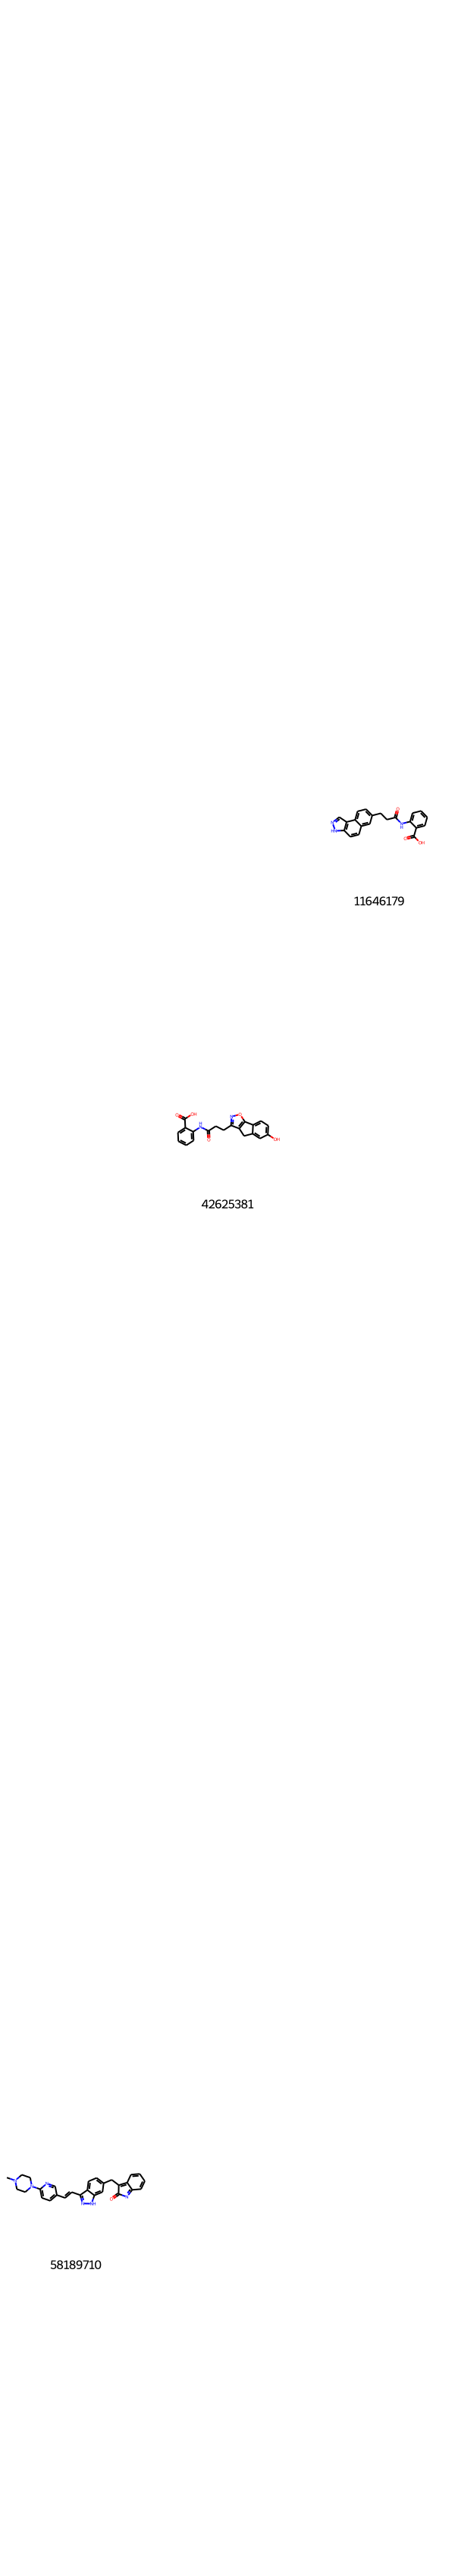

In [50]:
# display discarded molecules
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
#IPythonConsole.molSize = 500,500
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

smiles_list = reject_df['rdkit_smiles'].to_list()
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
Chem.Draw.MolsToGridImage(mol_list, molsPerRow=3, legends=reject_df.compound_id.to_list(), subImgSize=(200,200))
#PandasTools.AddMoleculeColumnToFrame(reject_df,'rdkit_smiles','molecule',includeFingerprints=True)

In [55]:
print("Number of discarded compounds",reject_excape[compound_id].nunique())
ofile=outdir+ target+'-EXCAPE.reject_check.csv'
reject.to_csv(ofile,index=False)

Number of discarded compounds 0


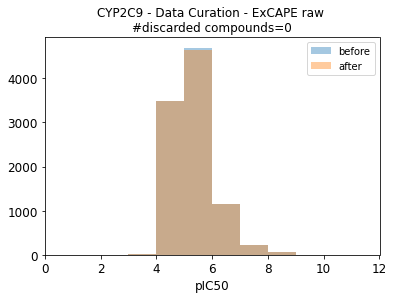

In [57]:
fig, ax = plt.subplots()
before=excape_raw_df["pIC50"]
after=excape_curated_df["pIC50"] 
sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')
plt.legend()
ax.set_xlim([0, 12])
plt.title(target+' - Data Curation - ExCAPE raw \n#discarded compounds='+str(reject_excape[compound_id].nunique()));